In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
%load_ext autoreload
%autoreload 2
from irma_dataset import Irma

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
dataset = Irma(root="../../data/IRMA/irma-xray-dataset")
dataset.load()

In [38]:
dataset.df.head()

,image_id,irma_code,Path,Technical Code,Directional Code,Anatomical Code,Biological Code,Imaging Modality,Body Region,Body Region Label
0,1877,1121-117-720-452,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,117,720,452,x-ray,abdomen,7
1,1879,1121-117-720-452,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,117,720,452,x-ray,abdomen,7
2,1880,1121-127-700-500,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,127,700,500,x-ray,abdomen,7
3,1882,1121-115-710-400,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,115,710,400,x-ray,abdomen,7
4,1883,1121-115-700-400,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,115,700,400,x-ray,abdomen,7


In [39]:
dataset.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12677 entries, 0 to 12676
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           12677 non-null  int64 
 1   irma_code          12677 non-null  object
 2   Path               12677 non-null  object
 3   Technical Code     12677 non-null  object
 4   Directional Code   12677 non-null  object
 5   Anatomical Code    12677 non-null  object
 6   Biological Code    12677 non-null  object
 7   Imaging Modality   12677 non-null  object
 8   Body Region        12677 non-null  object
 9   Body Region Label  12677 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 990.5+ KB


In [40]:
dataset.df.isnull().sum()

image_id             0
irma_code            0
Path                 0
Technical Code       0
Directional Code     0
Anatomical Code      0
Biological Code      0
Imaging Modality     0
Body Region          0
Body Region Label    0
dtype: int64

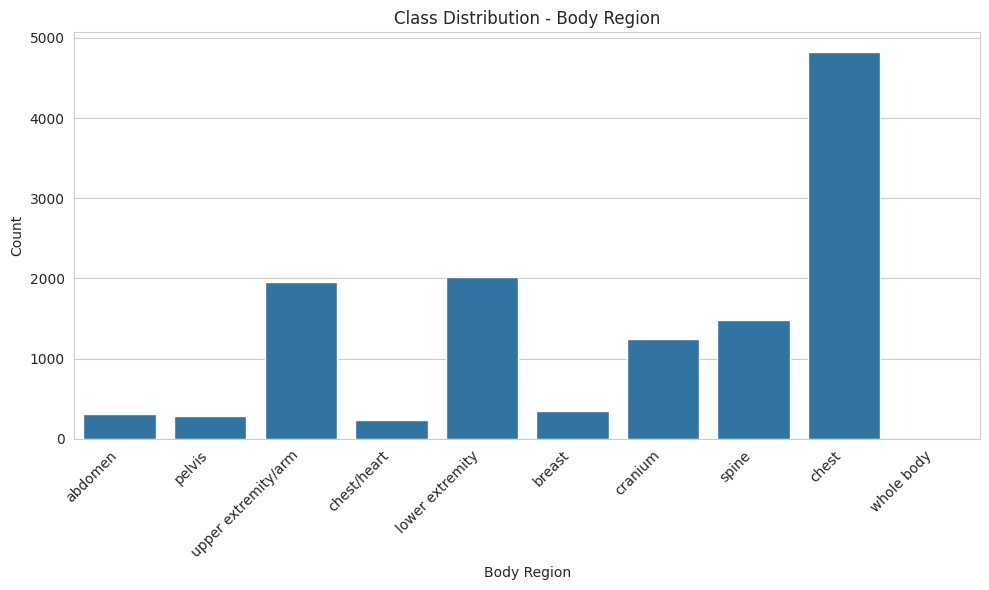

In [41]:
# Class distribution with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x="Body Region", data=dataset.df)
plt.title("Class Distribution - Body Region")
plt.xlabel("Body Region")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

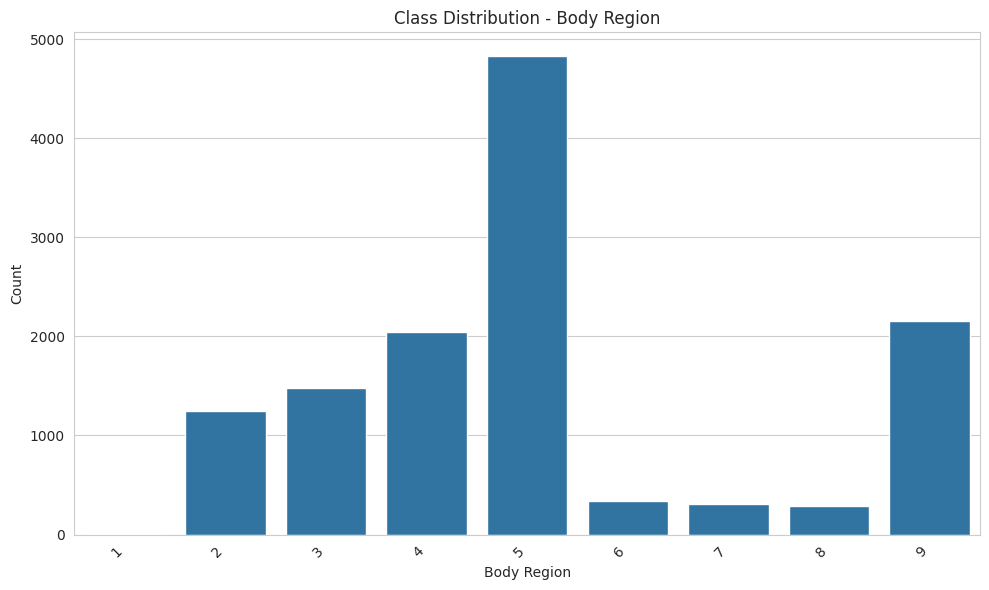

In [42]:
# Class distribution with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x="Body Region Label", data=dataset.df)
plt.title("Class Distribution - Body Region")
plt.xlabel("Body Region")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

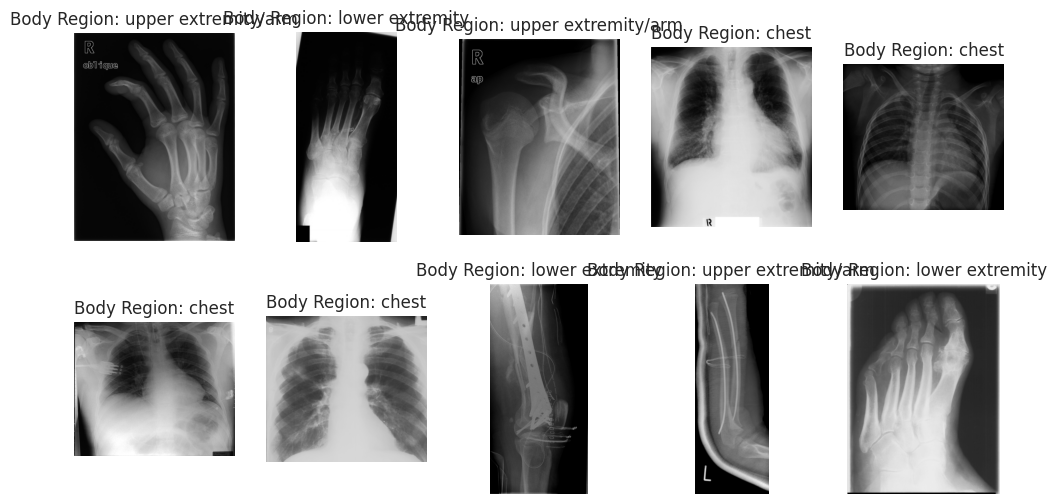

In [43]:
# Sample images
def show_sample_images(selection, num_samples=10):
    sample_images = selection.sample(num_samples)
    plt.figure(figsize=(12, 6))
    for i, (_, row) in enumerate(sample_images.iterrows(), 1):
        img = dataset.load_image(row["Path"])
        plt.subplot(2, int(num_samples/2), i)
        plt.imshow(img)
        plt.title(f"Body Region: {row['Body Region']}")
        plt.axis("off")
    plt.show()

show_sample_images(dataset.df)

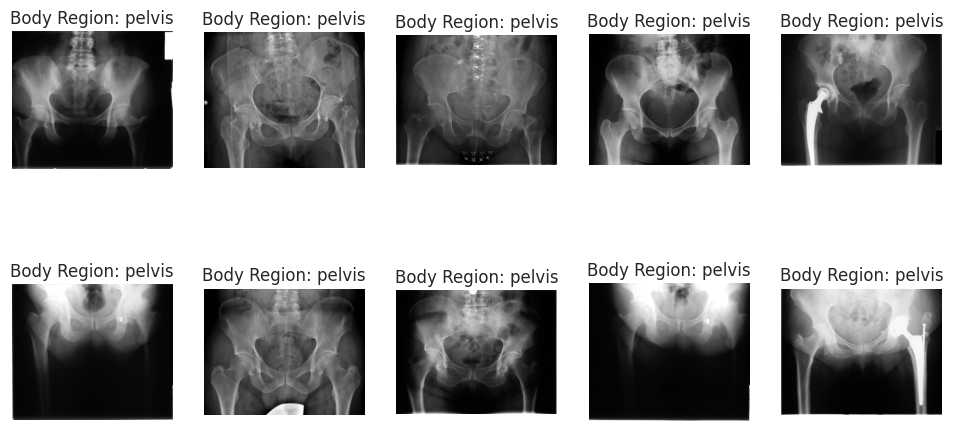

In [44]:
#body_region = "lower extremity"
#body_region = "breast"
body_region = "pelvis"

filtered_dataset = dataset.df[dataset.df["Body Region"] == body_region]

show_sample_images(filtered_dataset)

In [45]:
def analyze_sample_images(selection, num_samples=10):
    sample_images = selection.sample(num_samples)

    for i, (_, row) in enumerate(sample_images.iterrows(), 1):
        img = dataset.load_image(row["Path"])
        img_array = np.array(img)

        pixel_mean = np.mean(img_array)
        pixel_std = np.std(img_array)
        pixel_min = np.min(img_array)
        pixel_max = np.max(img_array)

        print(f"Image {i} - Statistics:")
        print(f"  Mean: {pixel_mean:.4f}")
        print(f"  Standard Deviation: {pixel_std:.4f}")
        print(f"  Min Value: {pixel_min}")
        print(f"  Max Value: {pixel_max}")
        print()

analyze_sample_images(dataset.df)

Image 1 - Statistics:
  Mean: 48.3662
  Standard Deviation: 65.9376
  Min Value: 2
  Max Value: 255

Image 2 - Statistics:
  Mean: 26.1728
  Standard Deviation: 23.8297
  Min Value: 7
  Max Value: 255

Image 3 - Statistics:
  Mean: 109.8014
  Standard Deviation: 61.4495
  Min Value: 0
  Max Value: 242

Image 4 - Statistics:
  Mean: 60.6512
  Standard Deviation: 39.0078
  Min Value: 0
  Max Value: 211

Image 5 - Statistics:
  Mean: 74.0714
  Standard Deviation: 56.8787
  Min Value: 0
  Max Value: 210

Image 6 - Statistics:
  Mean: 44.5783
  Standard Deviation: 30.8215
  Min Value: 4
  Max Value: 210

Image 7 - Statistics:
  Mean: 128.6138
  Standard Deviation: 59.3262
  Min Value: 12
  Max Value: 246

Image 8 - Statistics:
  Mean: 85.7973
  Standard Deviation: 58.4558
  Min Value: 0
  Max Value: 255

Image 9 - Statistics:
  Mean: 140.6042
  Standard Deviation: 70.4748
  Min Value: 0
  Max Value: 255

Image 10 - Statistics:
  Mean: 111.6952
  Standard Deviation: 78.9512
  Min Value: 0
  

In [46]:
def accumulate_statistics(selection, num_samples=10):
    accumulated_stats = {
        "mean": [],
        "std": [],
        "min": [],
        "max": []
    }

    sample_images = selection.sample(num_samples)
    for _, row in sample_images.iterrows():
        img = dataset.load_image(row["Path"])
        img_array = np.array(img)

        accumulated_stats["mean"].append(np.mean(img_array))
        accumulated_stats["std"].append(np.std(img_array))
        accumulated_stats["min"].append(np.min(img_array))
        accumulated_stats["max"].append(np.max(img_array))

    overall_stats = {
        "mean": np.mean(accumulated_stats["mean"]),
        "std": np.mean(accumulated_stats["std"]),
        "min": np.min(accumulated_stats["min"]),
        "max": np.max(accumulated_stats["max"])
    }

    return overall_stats

overall_statistics = accumulate_statistics(dataset.df)
print("Overall Pixel Statistics:")
print(f"  Mean: {overall_statistics['mean']:.4f}")
print(f"  Standard Deviation: {overall_statistics['std']:.4f}")
print(f"  Min Value: {overall_statistics['min']}")
print(f"  Max Value: {overall_statistics['max']}")

Overall Pixel Statistics:
  Mean: 79.9818
  Standard Deviation: 47.4735
  Min Value: 0
  Max Value: 255
